# Лабораторная работа 2

## Линейная регрессия

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ &mdash; столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_n$ &mdash; столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_n$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением &mdash; то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_n$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).

На лекциях было показано, что проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$ записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty,$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N &mdash; количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов, в $n$ различных моментов времени &mdash; это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ &mdash; это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обобщающая способность. Обучение и тест 

После того, как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них &mdash; о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2$$

В целом хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям. Например, если мы приближаем функцию одной переменной по значениям в $n$ точках, то наилучшей с точки зрения этой ошибки моделью будет многочлен $(n-1)$-й степени, для которого эта ошибка будет равна нулю.  Тем не менее, вряд ли истинная зависимость имеет вид многочлена большой степени. Более того, значения вам скорее всего даны с погрешностью, то есть вы подогнали вашу модель под свои зашумлённые данные, но на любых других данных (то есть в других точках) точность, скорее всего, окажется совсем не такой хорошей. Этот эффект называют **переобучением**; говорят также, что **обобщающая способность** модели оказалась скверной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Задание 1. Метод наименьших квадратов (4 балла)

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором &mdash; тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом &mdash; $n$ точек (значения аргумента $x$), во втором &mdash; значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача &mdash; по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [2]:
import numpy as np
import scipy.linalg as linal
data_train = np.loadtxt('train.txt', delimiter=',')
data_test = np.loadtxt('test.txt', delimiter=',')

Разделим значения $x$ и $y$

In [3]:
x_train = data_train[:,0]
y_train = data_train[:,1]
x_test = data_test[:,0]
y_test = data_test[:,1]

Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``).

In [4]:
X = np.array(x_train)
Y = np.array(y_train)
A = np.vstack([X, np.ones(len(X))]).T
# y = kx + b как y = Az, где A = [[ x 1 ]] и z = [[k], [b]]
# z = (A.T * A) ^ (-1) * (A.T * Y)
z = np.dot(np.dot(linal.inv(np.dot(A.T, A)), A.T), Y)
k, b = z[0], z[1]
print('k =', k)
print('b =', b)

k = 2.2791344980519463
b = 4.433230905064935


Нарисуйте на плоскости точки $(x_i, y_i)$ и полученную линейную функцию. Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию. Найдите этот многочлен и нарисуйте его график.

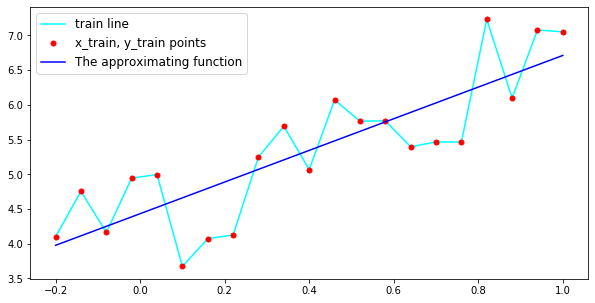

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 5))
plt.plot(X, Y, 'cyan', label = 'train line')
plt.plot(X, Y, 'ro', label = 'x_train, y_train points', markersize = 5)
plt.plot(X,  k * X + b, 'blue', label = 'The approximating function')
plt.legend(shadow = False, fontsize = 12)

Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором - по парам из тестовых данных).

Для $k = 1,2,3,4,6$ напечатайте коэффициенты полученных многочленов и нарисуйте их графики на одном чертеже вместе с точками $(x_i, y_i)$ (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

In [6]:
import math

print(x_train)
N = len(X)
mseTrain = np.zeros(10)  # Массив ср. кв. ошибок для обучающих данных
mseTest = np.zeros(10)  # Массив ср. кв. ошибок для тестовых данных
# Их размерности одинаковы, а i-ый элемент (i-я ошибка) соотвествует многочлену степени (i + 1)

# Будем запоминать коэфы в матрицу 10 * 11
# Она нам понадобится, чтобы вывести графики и найти нужный многочлен с минимальной ошибкой   
polynom_mat = np.zeros((10, 11))  # В многочлене степени k (k + 1) слагаемое, поэтому столбцов 11 (k = 10)

for k in range(1, 11):
    # https://ru.wikipedia.org/wiki/Метод_наименьших_квадратов#Случай_полиномиальной_модели
    A = np.zeros((k + 1, k + 1))
    A[0, 0] = N
    # Filling diagonal
    for i in range(1, k + 1):
        for elem in x_train:
            A[i, i] += elem ** (i * 2)
    
    # Заполняем остальное по принципу строка-столбец в силу симметрии
    a = 0
    for i in range(k + 1):  #  Строки
        a += 1  # Элемент A[a, a] не трогаем, т. к. диагональ мы уже заполнили
        for j in range(a, k + 1):  #  Столбцы
            for elem in x_train:
                A[i, j] += elem ** (i + j)
            A[j, i] = A[i, j] # По симметрии

    # На этом этапе матрица A найдена, ищем вектор результатов
    c = np.zeros(k + 1)
    for i in range(k + 1):
        for j in range(N):
            c[i] += (x_train[j] ** (i)) * y_train[j]

    # Найдено
    # Теперь ищет столбец коэффицентов многочлена b
    # Решаем СЛУ Ab = c
    b = np.dot(linal.inv(A), c) 
    # Коэфиценты многочлена найдены
    # Вносим их в общую матрицу
    for j in range(len(b)):
        polynom_mat[k - 1, j] = b[j]
    
    # Далее ищем минимальную кв. ошибку
    # Помним про mse-шки
    # Вычислим ошибки
    
    for i in range(N):
        pow = 0
        polynom_train = 0
        polynom_test = 0
        for elem_b in b:
            polynom_train += elem_b * (x_train[i] ** pow) # Значение многочлена в точке
            polynom_test += elem_b * (x_test[i] ** pow)
            pow += 1
        mseTrain[k - 1] += (polynom_train - y_train[i]) ** 2
        mseTest[k - 1] += (polynom_test - y_test[i]) ** 2

    mseTrain[k - 1] /= N
    mseTest[k - 1] /= N

# Теперь найдем многочлен с соответствующей минимальной погрешностью
# Суть в том, что индексы строк polynom_mat и индексы mse_... согласованы
# То есть, i-ая ошибка для (i + 1)-ой степени многочлена соотствует i-ой ошибке
# Чтош, ищем
i_rem = 0
for i in range(10):
    if (abs(mseTrain[i]) < abs(mseTrain[i_rem])):
        i_rem = i

print('Ошибки:')
print('train:', mseTrain)
print('test:', mseTest)
print()
print('Минимальная ошибка: ', mseTrain[i_rem])
print('Степень искомого многочлена: ', i_rem + 1)
print('Искомый многочлен: ')
for i in range (i_rem + 1):
    print(polynom_mat[i_rem, i], end = ' ')
print()

[-0.2  -0.14 -0.08 -0.02  0.04  0.1   0.16  0.22  0.28  0.34  0.4   0.46
  0.52  0.58  0.64  0.7   0.76  0.82  0.88  0.94  1.  ]
Ошибки:
train: [0.29689663 0.26969892 0.26949719 0.26106653 0.24998505 0.18829349
 0.18539621 0.15905557 0.15847184 0.15316611]
test: [ 0.4351202   0.35647629  0.35534646  0.44172702  0.5579732   2.58169293
  2.51578291  4.35728841  4.7763448  14.63205336]

Минимальная ошибка:  0.153166109977218
Степень искомого многочлена:  10
Искомый многочлен: 
4.6691723668572775 -2.159858107769654 -36.17528599506089 44.93743109872628 1201.942892883463 -1660.8363238619868 -12969.756950358 46686.17401442888 -63620.39552536395 40177.15745374069 


Коэффиценты для многочлена степени k = 1
4.433230905064932 2.2791344980519472 
Коэффиценты для многочлена степени k = 2
4.472476503404162 1.1578316883597495 1.4016285121152712 
Коэффиценты для многочлена степени k = 3
4.4607363552851 1.0650161052852736 1.8597508372608462 -0.3817686042880336 
Коэффиценты для многочлена степени k = 4
4.34116612039968 1.1718023926318732 6.794091784358706 -13.051328119991439 7.918474697315751 
Коэффиценты для многочлена степени k = 5
4.43129781382336 -0.13059803987822954 3.2747144018195513 21.374796276302 -51.13148138553182 29.524978041406737 
Коэффиценты для многочлена степени k = 6
4.383795011026895 -4.597179325054836 16.002903990199904 121.25709712798194 -481.51013287688994 581.4532982332721 -229.9701334141061 


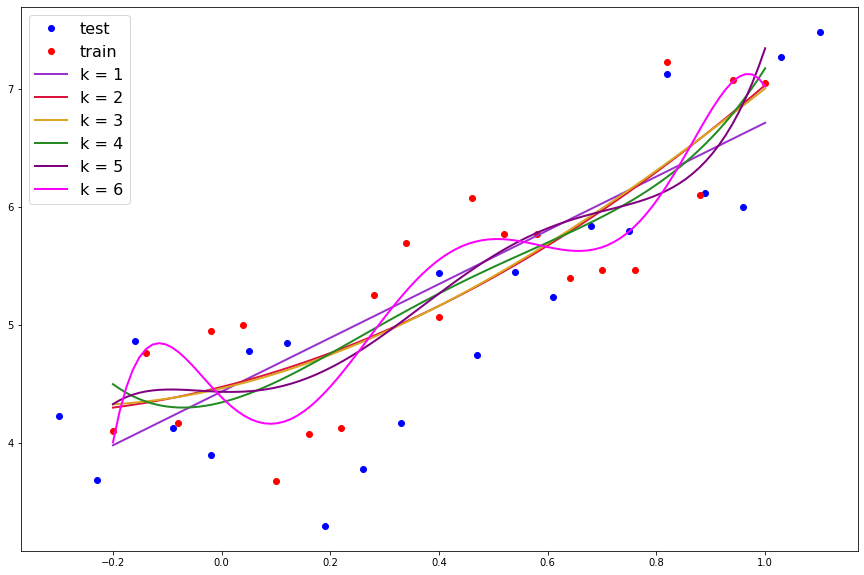

In [7]:
def DrawPolyXi(xx, koeffs):
    res_arr = []
    for i in range(len(xx)):
        pow = 0
        value = 0
        for koef in koeffs:
            value += koef * (xx[i] ** pow)
            pow += 1
        res_arr.append(value)
    return res_arr


# Выпишим коэфиценты
for k in range(6):
        print('Коэффиценты для многочлена степени k =', k + 1)
        for i in range (k + 2):
            print(polynom_mat[k, i], end = ' ')
        print()

# Построим график
plt.figure(figsize=(15, 10))
x = np.linspace(min(x_train), max(x_train), 100)
# Точки
plt.plot(x_test, y_test, 'bo', label='test', markersize = 6)
plt.plot(x_train, y_train, 'ro', label='train', markersize = 6)
# Полиномы
plt.plot(x, DrawPolyXi(x, polynom_mat[0]), 'darkorchid', label = 'k = 1', linewidth = 2)
plt.plot(x, DrawPolyXi(x, polynom_mat[1]), 'crimson', label = 'k = 2', linewidth = 2)
plt.plot(x, DrawPolyXi(x, polynom_mat[2]), 'goldenrod', label = 'k = 3', linewidth = 2)
plt.plot(x, DrawPolyXi(x, polynom_mat[3]), 'forestgreen', label = 'k = 4', linewidth = 2)
plt.plot(x, DrawPolyXi(x, polynom_mat[4]), 'purple', label = 'k = 5', linewidth = 2)
plt.plot(x, DrawPolyXi(x, polynom_mat[5]), 'magenta', label = 'k = 6', linewidth = 2)
# Оставил просто так
#plt.plot(x_train, DrawPolyXi(x_train, polynom_mat[6]), 'skyblue', label = 'k = 7', linewidth = 2)
#plt.plot(x_train, DrawPolyXi(x_train, polynom_mat[7]), 'brown', label = 'k = 8', linewidth = 2)
#plt.plot(x_train, DrawPolyXi(x_train, polynom_mat[8]), 'aqua', label = 'k = 9', linewidth = 2)
#plt.plot(x_train, DrawPolyXi(x_train, polynom_mat[9]), 'k', label = 'k = 10', linewidth = 2)
plt.legend(shadow = False, fontsize = 16)

Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$?

In [8]:
# Вывел для наглядности
print('Ошибки:')
print('train:', mistake_train)
print('test:', mistake_test)

Ошибки:


NameError: name 'mistake_train' is not defined

*Как мы видим, при увеличении степени k происходит значительное расхождение (если можно так сказать, увеличение ошибки): при увеличении степени полинома (начиная с шестой), данные интерполируются, а должны экстраполироваться. Возникает явление переобучения. Это связано с тем, что мы "связали" модель с определенными данными (train), которые так же не обделены погрешностью. 
Из этого вытекает, что на других данных ее поведение может отличаться, и приближение уже не будет таким точным. Так мы и получаем переобучение.*

### Задание 2. Линейная регрессия (4 балла)

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков. Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами.

С помощью известных вам формул найдите регрессионные коэффициенты. Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Оцените качество приближения, вычислив среднеквадратическую ошибку.

In [ ]:
# Чтобы найти зависимость, надо найти линейную комбинацию, а нам для этого нужны коэффы
X = []  # Матрица признаков
prices = []  # Массив цен, в X этот столбец не нужен
# Считывание данных из файла и расфасовка по массивам
file = open('flats_moscow_mod.txt', 'r')
file.readline()  # Пропускаем первую строку
for line in file:
    s = line.split()
    prices.append(float(s[0]))
    mat_data = []
    for i in range(1, 6):
        mat_data.append(float(s[i]))
    mat_data.append(1)  # Добавляем столбец единиц
    X.append(np.array(mat_data))
X = np.array(X)
Y = np.array(prices)

# Xa = Y, a - столбец искомых коэффов
a = np.dot(np.dot(linal.inv(np.dot(X.T, X)), X.T), Y)
print('Искомые коэффициенты: ')
print(a[0], '* totsp')
print(a[1], '* livesp')
print(a[2], '* kitsp')
print(a[3], '* dist')
print(a[4], '* metrdist')
print(a[5])  # Свободный член, связан с тем, что у нас есть столбец единиц
file.close()

*Знаки обозначают то, как характеристика влияет на цену квартиры. К примеру, все хотям иметь квартиру в шаговой доступности от центра города. Чем дальше квартиры от центра - тем они дешевле. В данном случае мы видим такую тенденцию с расстоянием до метро и расстояние от цента: чем больше - тем хуже, как следствие дешевле. Свободным коэффициентом в регрессионной модели является некая случайная величина. В нашем случае тоже: это может быть какой-то рыночный прикол и тд. На самом деле, это очень жизненно.*

In [ ]:
mse = 0
N = len(Y)
for i in range(N):
    val = 0
    for j in range(6):
        val += X[i, j] * a[j]
    mse += (val - Y[i]) ** 2
mse /= N
print('Среднеквадратическая ошибка: ', mse)

### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению. 

**Сравнение моделей**

Когда вы построите новую модель, вам захочется понять, лучше она или хуже, чем изначальная. Проверять это на той же выборке, на которой вы обучались, бессмысленно и даже вредно (вспомните пример с многочленами: как прекрасно падала ошибка на обучающей выборке с ростом степени!). Поэтому вам нужно будет разделить выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split`.

In [ ]:
temp = np.array(np.vstack([np.log(X[:,0]), np.log(X[:,1]), np.log(X[:,2]), np.log(X[:,3]),\
                          np.log(X[:,4]), X[:,0] ** 8, X[:,1] ** 8, X[:,2] ** 8, X[:,3] ** 8,\
                          X[:,4] ** 8, X[:,0] * X[:,1], X[:,0] * X[:,2], X[:,0] * X[:,3], X[:,0] * X[:,4],\
                          X[:,1] * X[:,2], X[:,1] * X[:,3], X[:,1] * X[:,4], X[:,2] * X[:,3], X[:,2] * X[:,4],\
                          X[:,3] * X[:,4], np.log(X[:,0] * X[:,1]) ** 16, np.log(X[:,0] * X[:,2]) ** 16,\
                          np.log(X[:,0] * X[:,3]) ** 16, np.log(X[:,0] * X[:,4]) ** 16,\
                          np.log(X[:,1] * X[:,2]) ** 16, np.log(X[:,1] * X[:,3]) ** 16, np.log(X[:,1] * X[:,4]) ** 16,\
                          np.log(X[:,2] * X[:,3]) ** 16, np.log(X[:,2] * X[:,4]) ** 16,\
                          np.log(X[:,3] * X[:,4]) ** 16,\
                          np.log(X[:,0]) * np.log(X[:,1]), np.log(X[:,0]) * np.log(X[:,2]),\
                          np.log(X[:,0]) * np.log(X[:,3]), np.log(X[:,0]) * np.log(X[:,4]),\
                          np.log(X[:,1]) * np.log(X[:,2]), np.log(X[:,1]) * np.log(X[:,3]),\
                          np.log(X[:,1]) * np.log(X[:,4]), np.log(X[:,2]) * np.log(X[:,3]),\
                          np.log(X[:,2]) * np.log(X[:,4]), np.log(X[:,3]) * np.log(X[:,4]),\
                          X[:,5]]).T)
# X[:,5] - столбец единиц
#print(np.dot(X_remastered.T, X_remastered)[:,5:10])
X_remastered = np.concatenate((X[:,0:5], temp), axis = 1) # X[:,0:5] - берем всю матрицу без единичного столбца
matDet = linal.det(np.dot(X_remastered.T, X_remastered)) # / (10 ** 300)
#print('|X_remastered| = ', matDet)
#if (matDet != 0):
#    print('Матрица невырожденная')
#else:
#    print('Матрица вырожденная')
a_remastered = np.dot(np.dot(linal.inv(np.dot(X_remastered.T, X_remastered)), X_remastered.T), Y)  # Новые коэффы

from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(X_remastered, Y, test_size = 0.3, random_state = 5)


def MSE(X, Y, koeffs):
    mse = 0
    n = len(X)
    for i in range(n): 
        val = np.dot(X[i], koeffs)
        mse += (val - Y[i]) ** 2
    mse /= n
    return mse


#mse_train = MSE(x_tr, y_tr, a_remastered)
mse_test = MSE(x_te, y_te, a_remastered)
print()
#print(mse_train)
print('Новая ошибка: ', mse_test)

### Задание 3. Регуляризация (2 балла)

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться (то есть будет, но не с помощью приведённой выше формулы). В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы &mdash; необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них &mdash; регуляризация. Сейчас мы рассмотрим одну из её разновидностей &mdash; **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda$ &mdash; некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. Параметр $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала. 

Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регрессии. Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$.

In [12]:
import random
random_lambdas = []
X = np.array(x_train)
Y = np.array(y_train)
N = len(X)
# Создаем матрицу степеней от 0-ой до k-ой
X = np.vstack([x_train ** 0, x_train, x_train ** 2, x_train ** 3, x_train ** 4, x_train ** 5, x_train ** 6]).T
# 100 000 псевдослучайных чисел в промежутке [1, 1.2]
for i in range(100000):
    #Было
    #random_lambdas.append(round(random.random(), 4) * (20) - 10) #[a, b) - rn * (b - a) + a - промежуток [-10; 10)
    #Стало
    random_lambdas.append(round(random.random(), 10) * (0.2) + 1) #[a, b) - rn * (b - a) + a
# Тут я немного погонялся за точностью и понял, что искомая лямбда принадлежит [1, 1.2)
# В общем-то, если грубо округлять, то она равна примерно 1.158
# ПЫ.СЫ. проверял на 1 000 000 числах, результат - 1.15766...
min_mse = math.inf;
needed_lambda = random_lambdas[0]
for lamb in random_lambdas:
    b = np.dot(np.dot(linal.inv(np.dot(X.T, X) + lamb * np.eye(7)), X.T), Y)
    sixth_mse_train, sixth_mse_test = 0, 0
    for i in range(N):
            pow, polynom_test = 0, 0
            for elem_b in b:
                polynom_test += elem_b * (x_test[i] ** pow)
                pow += 1
            sixth_mse_test += (polynom_test - y_test[i]) ** 2
    sixth_mse_test /= N
    if (sixth_mse_test < min_mse):
        min_mse = sixth_mse_test
        needed_lambda = lamb
    
print('Для многочлена степени k = 6: ')
print('Ошибка без регуляризации: ', mseTest[5])
print('Ошибка с регуляризацией: ', min_mse)
print('Ламбда: ', needed_lambda)

Для многочлена степени k = 6: 
Ошибка без регуляризации:  2.5816929325078832
Ошибка с регуляризацией:  0.30734408952883524
Ламбда:  1.1576680751400001


In [13]:
# Сравним определители
oneDet = linal.det(np.dot(X.T, X))
twoDet = linal.det(np.dot(X.T, X) + needed_lambda * np.eye(7))
print(oneDet, twoDet)
if (oneDet > twoDet):
    print('|𝑋.𝑇𝑋| больше |𝑋.𝑇𝑋+𝜆𝐸|')
elif (oneDet < twoDet):
    print('|𝑋.𝑇𝑋| меньше |𝑋.𝑇𝑋+𝜆𝐸|')
# Крайне маловероятно, но для приличия напишу
elif (np.abs(oneDet - twoDet) > 1e-6):
    print('Определители равны')
# Потом мб сделаю проверку для вещественных чисел

9.082864838378147e-12 1011.1861929666412
|𝑋.𝑇𝑋| меньше |𝑋.𝑇𝑋+𝜆𝐸|


Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без. Чем первый из них выгодно отличается от второго?

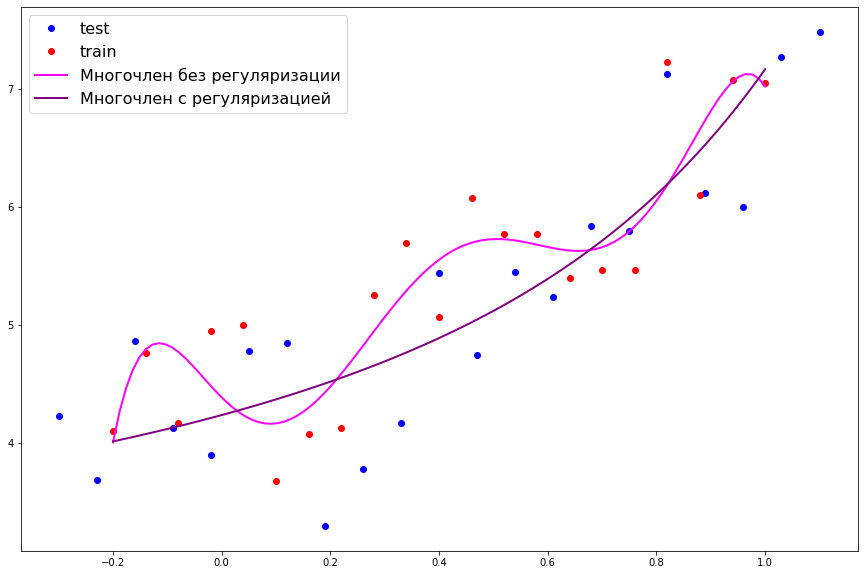

In [14]:
# Да изи ваще
# Помните функцию def DrawPolyXi(xx, koeffs)? Она нам пригодится
plt.figure(figsize=(15, 10))
x = np.linspace(min(x_train), max(x_train), 100)
# Точки
plt.plot(x_test, y_test, 'bo', label='test', markersize = 6)
plt.plot(x_train, y_train, 'ro', label='train', markersize = 6)
# Полиномы
plt.plot(x, DrawPolyXi(x, polynom_mat[5]), 'magenta', label = 'Многочлен без регуляризации', linewidth = 2)
plt.plot(x, DrawPolyXi(x, b), 'purple', label = 'Многочлен с регуляризацией', linewidth = 2)
plt.legend(shadow = False, fontsize = 16)

*На графике мы видим, что точность упала, но сама задача стала описываться более точно, обусловлено. У параметр регуляризации (лямбда), мы уменьшаем точность, но становится лучше понятно, что происходит.*

Попробуйте доказать, что вектор $a = (X^TX + \lambda E)^{-1}X^Ty$ является решением задачи

$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min$$

Интуитивно это можно понимать так: мы ищем компромисс между минимизацией длины разности $|Xa - y|$ (то есть точностью решения задачи регрессии) и тем, чтобы компоненты вектора $a$ не становились слишком большими по модулю.

---

**Ваше решение напишите прямо здесь**

$|Xa - y|$ - это *расстояние* между $Xa$ и $y$, где $Xa$ - это *ортогональная проекция* $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$, ну а $y$ - вектор столбец СЛУ, которое имеет *псевдорешение* в виде $a$.
Кроме того, для вектора $a$ длина разности $|Xa - y|\rightarrow\min$, а значит, и $|Xa - y|^2\rightarrow\min$ *(по МНК)*.

$\lambda|a|^2$ же является некоторым *скаляром*, который на асимптотику не влияет. Таким образом, его можно отбросить, и мы получим, что из $|Xa - y|^2\rightarrow\min$ следует, что $|Xa - y|^2 + \lambda|a|^2\rightarrow\min$. Собственно, доказано (?).

### Задание 4. Онлайн-обучение линейной регрессии (3 балла)

Раньше мы работали в ситуации, когда объекты $x_i$ и значения $y_i$ даны с самого начала и всегда доступны. Допустим теперь, что пары $(x_i, y_i)$ поступают к нам по одной и мы не можем себе позволить хранить их все в памяти (это может быть актуально, например, если вы пытаетесь обучить модель на устройстве со сравнительно небольшим количеством оперативной памяти: скажем, на мобильном телефоне или на бортовом компьютере спутника связи). В этом случае нам нужно уметь решать следующую задачу:

**Известно:** решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$;

**На вход поступает:** новая пара $(x_{t+1}, y_{t+1})$;

**Требуется:** быстро (за время, не зависящее от $t$) отыскать решение задачи регрессии для расширенного датасета $(x_1, y_1),\ldots,(x_t,y_t),(x_{t+1}, y_{t+1})$.

Эту задачу мы будем решать в два этапа.

**Этап 1.** Введём обозначения $X_{(t)} = (x_1\ldots x_t)$ и $y_{(t)} = (y_1,\ldots,y_t)^T$. Тогда, как мы хорошо помним, решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$ имеет вид $\hat{a}_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}X^T_{(t)}y_{(t)}$. Размеры матриц $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ не зависят от $t$, поэтому их мы, пожалуй, можем себе позволить хранить в памяти.

И вот ваше первое задание в этом разделе: придумайте алгоритм, принимающий на вход матрицы $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$, а также пару $(x_{t+1}, y_{t+1})$ и вычисляющий матрицы $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$. Сложность вашего алгоритма не должна зависеть от $t$!

--

**Описание вашего алгоритма напишите прямо здесь**

**Этап 2.** Теперь настало время написать немного кода и порисовать красивые картинки. Вам нужно будет реализовать симуляцию онлайн-обучения регрессии для задачи приближения функции (в данном случае $f_{true}(x) = 2x\sin(x) + x^2 - 1$; все значения искажены небольшим нормальным шумом) многочленом степени не выше 5.

In [15]:
from IPython.display import clear_output

f_true = lambda x: 2*x*np.sin(5*x) + x**2 - 1 # this is the true function

# We need this to make the plot of f_true:
x_grid = np.linspace(-2,5,100) # 100 linearly spaced numbers
x_grid_enl = np.hstack((x_grid.reshape((100,1))**j for j in range(6)))
y_grid = f_true(x_grid)


for i in range(200):

    x_new = np.random.uniform(-2, 5)
    y_new = f_true(x_new) + 2*np.random.randn()
    
    # your code goes here
    
    # the rest of code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.plot(x_grid,y_grid, color='blue', label='true f')
        plt.scatter(x_new, y_new, color='red')
        
        # your code goes here
        y_pred = #...
        
        plt.scatter(x_grid, y_pred, color='orange', linewidth=5, label='predicted f')
        
        plt.legend(loc='upper left')
        plt.show()

SyntaxError: invalid syntax (<ipython-input-15-5da8dba117bd>, line 25)

### Добавление. QR-разложение

**QR-разложением** матрицы $A$ (не обязательно квадратной) мы будем называть её представление в виде $A = QR$, где $Q$ &mdash; матрица с ортонормированными столбцами, а $R$ &mdash; верхнетреугольная матрица.

Смысл QR-разложения следующий. Пусть $a_1,\ldots,a_m$ &mdash; столбцы матрицы $A$, $q_1,\ldots,q_t$ &mdash; столбцы матрицы $Q$. Тогда $q_1,\ldots,q_t$ &mdash; это ортонормированный базис в подпространстве, являющемся линейной оболочкой векторов $a_1,\ldots,a_m$, а в матрице $R$ записаны коэффициенты, с помощью которых $a_i$ выражаются через $q_1,\ldots,q_t$.

Находить QR-разложение заданной матрицы можно разными способами. Мы познакомим вас не с самым лучшим из них, но по крайней мере с наиболее простым концептуально. Заметим, что ортогональный базис линейной оболочки можно найти с помощью ортогонализации Грама-Шмидта. При этом коэффициенты из матрицы $R$ получаются в качестве побочного продукта этого процесса:

```python
for j = 1...n:
    q_j = a_j
    for i = 1,...,j-1:
        r_ij = (q_i, a_j)
        q_j = q_j - r_ij * q_i
    r_jj = |q_j|
    if r_jj == 0: # a_j in <a_1,...,a_j-1>
        # What would you do in this case?..
    q_j = q_j / r_jj
```

Для нахождения QR-разложения вы можете использовать библиотечную функцию `scipy.linalg.qr`.

Поскольку лабораторная про линейную регрессию, не так-то просто замять вопрос о том, какое же отношение QR-разложение имеет к задаче регрессии. Упомянем одно из возможных применений.

Допустим, мы нашли QR-разложение матрицы $X$, а именно: $X = QR$. Тогда
$$X^TX = (QR)^T(QR) = R^TQ^TQR = R^TR$$

Поскольку в задаче регрессии матрица $X$ обычного полного ранга (то есть её столбцы линейно независимы), матрица $R$ будет квадратной. Благодаря этому нашу обычную формулу для набора регрессионных коэффициентов $\hat{a}$ можно переписать в следующем виде:

$$\hat{a} = (X^TX)^{-1}X^Ty = (R^TR)^{-1}(QR)^Ty = R^{-1}(R^T)^{-1}R^TQ^Ty = R^{-1}Q^Ty$$

Как видите, формула стала проще. Более того, зачастую обращение матрицы $R$ может быть численно более устойчиво, чем обращение матрицы $X^TX$.